#Data link:- https://drive.google.com/open?id=1VxoJDgyiAdMRI7-Fp7RxazDTvQ9Lw54d


## Load important libraries  into our project

In [1]:
#importing the important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller

# other libraries
from pandas.tools.plotting import autocorrelation_plot
from statsmodels.tsa.arima_model import ARIMA, ARMAResults
import datetime
import sys
import statsmodels.stats.diagnostic as diag
from scipy.stats.mstats import normaltest
%matplotlib inline

### Step 1. Loading the csv file data in correct format in pandas data frame

In [2]:
#loading data in data frame
df = pd.read_csv('data_stocks.csv')
df.head()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


In [3]:
# converting date columns into date type datatype from int
df['DATE']=pd.to_datetime(df['DATE'],unit='s')

In [4]:
df['DATE'].head()

0   2017-04-03 13:30:00
1   2017-04-03 13:31:00
2   2017-04-03 13:32:00
3   2017-04-03 13:33:00
4   2017-04-03 13:34:00
Name: DATE, dtype: datetime64[ns]

In [5]:
df.set_index(['DATE'], drop=True, append=False, inplace=True, verify_integrity=False)
df.head()

,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,NASDAQ.AMAT,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
DATE,,,,,,,,,,,,,,,,,,,,,
2017-04-03 13:30:00,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,38.99,...,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
2017-04-03 13:31:00,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,39.01,...,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
2017-04-03 13:32:00,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,38.91,...,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
2017-04-03 13:33:00,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,38.84,...,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
2017-04-03 13:34:00,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,38.93,...,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


In [6]:
# describe the data frame
df.describe()

,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,NASDAQ.AMAT,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
count,41266.000000,41266.000000,41266.000000,41266.00000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,...,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000
mean,2421.537882,47.708346,150.453566,141.31793,79.446873,103.480398,102.998608,50.894352,122.981163,43.291988,...,97.942211,104.740666,46.664402,43.043984,80.784595,19.300718,54.541988,71.757891,121.423515,60.183874
std,39.557135,3.259377,6.236826,6.91674,2.000283,4.424244,9.389788,4.833931,11.252010,2.448582,...,5.411795,10.606694,1.508444,1.714533,1.840989,11.686532,3.526321,4.038272,5.607070,3.346887
min,2329.139900,40.830000,140.160000,128.24000,74.800000,95.870000,83.000000,44.650000,96.250000,37.460000,...,83.410000,89.510000,44.090000,39.120000,76.060000,6.660000,48.820000,63.180000,110.120000,52.300000
25%,2390.860100,44.945400,144.640000,135.19500,78.030000,101.300000,94.820000,47.440000,116.950000,41.690000,...,95.960000,95.010000,45.155000,41.955000,80.220000,7.045000,51.630000,69.110000,117.580000,59.620000
50%,2430.149900,48.360000,149.945000,142.26000,79.410000,102.440000,106.820000,49.509900,123.620000,43.650000,...,99.250000,99.660000,46.810000,43.200000,81.150000,27.890000,53.850000,73.470000,120.650000,61.585600
75%,2448.820100,50.180000,155.065000,147.10000,80.580000,104.660000,110.490000,52.230000,132.218800,44.935000,...,102.080000,117.034700,47.730000,44.370000,82.062050,30.470000,57.140000,74.750000,126.000000,62.540000
max,2490.649900,54.475000,164.510000,155.33000,90.440000,121.770000,119.270000,62.560000,142.875000,47.830000,...,106.375000,123.870000,49.660000,47.210000,83.630000,32.930000,62.130000,77.120000,133.450000,63.840000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 41266 entries, 2017-04-03 13:30:00 to 2017-08-31 20:00:00
Columns: 501 entries, SP500 to NYSE.ZTS
dtypes: float64(501)
memory usage: 158.0 MB


In [8]:
# shape of df
df.shape

(41266, 501)

In [9]:
# checking for the null values
set(df.isnull().sum().values)

{0}

There is no null values in data frame

### Step 2:- Defining  time series from data frame

### <-->  AAPL

In [10]:
# series NASDAQ.AAPL
series_aapl=df['NASDAQ.AAPL']
series_aapl.head()

DATE
2017-04-03 13:30:00    143.6800
2017-04-03 13:31:00    143.7000
2017-04-03 13:32:00    143.6901
2017-04-03 13:33:00    143.6400
2017-04-03 13:34:00    143.6600
Name: NASDAQ.AAPL, dtype: float64

### <--> ADP

In [11]:
# series NASDAQ.ADP
series_adp=df['NASDAQ.ADP']
series_adp.head()

DATE
2017-04-03 13:30:00    102.2300
2017-04-03 13:31:00    102.1400
2017-04-03 13:32:00    102.2125
2017-04-03 13:33:00    102.1400
2017-04-03 13:34:00    102.0600
Name: NASDAQ.ADP, dtype: float64

### <--> CBOE

In [12]:
# series NASDAQ.CBOE
series_cboe=df['NASDAQ.CBOE']
series_cboe.head()

DATE
2017-04-03 13:30:00    81.03
2017-04-03 13:31:00    81.21
2017-04-03 13:32:00    81.21
2017-04-03 13:33:00    81.13
2017-04-03 13:34:00    81.12
Name: NASDAQ.CBOE, dtype: float64

### <--> CSCO

In [13]:
# series NASDAQ.CSCO
series_csco=df['NASDAQ.CSCO']
series_csco.head()

DATE
2017-04-03 13:30:00    33.7400
2017-04-03 13:31:00    33.8800
2017-04-03 13:32:00    33.9000
2017-04-03 13:33:00    33.8499
2017-04-03 13:34:00    33.8400
Name: NASDAQ.CSCO, dtype: float64

### <--> EBAY

In [14]:
# series NASDAQ.EBAY
series_ebay=df['NASDAQ.EBAY']
series_ebay.head()

DATE
2017-04-03 13:30:00    33.3975
2017-04-03 13:31:00    33.3950
2017-04-03 13:32:00    33.4100
2017-04-03 13:33:00    33.3350
2017-04-03 13:34:00    33.4000
Name: NASDAQ.EBAY, dtype: float64

### Step 3. Exploring the data and visualization regarding stationarity

### <--> AAPL

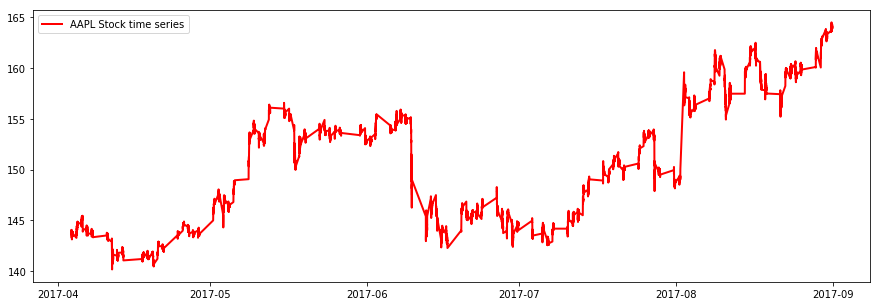

In [15]:
plt.figure(figsize=(15,5))
plt.plot(series_aapl,color='red', linewidth=2,label='AAPL Stock time series')
plt.legend(loc='upper left')
plt.show()

### <--> ADP

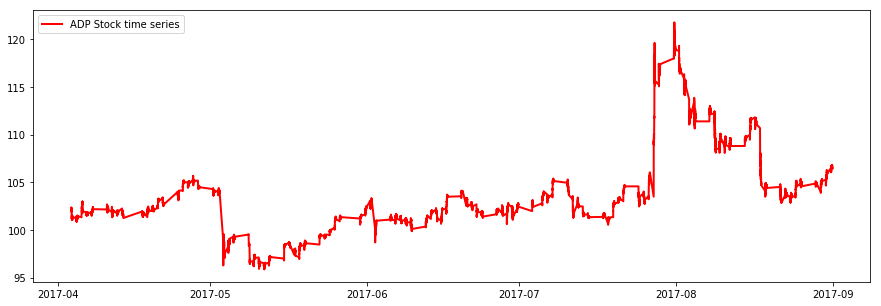

In [16]:
plt.figure(figsize=(15,5))
plt.plot(series_adp,color='red', linewidth=2,label='ADP Stock time series')
plt.legend(loc='upper left')
plt.show()

### <--> CBOE

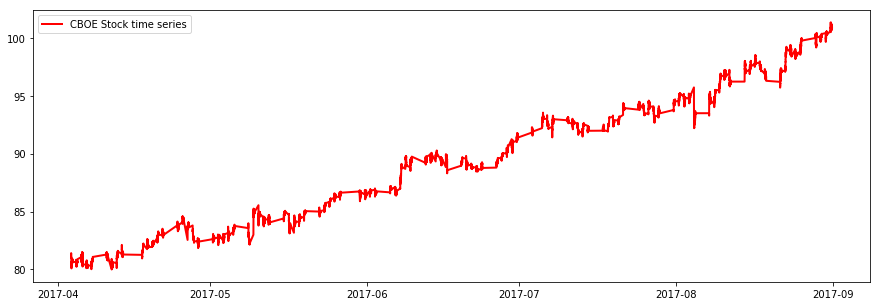

In [17]:
plt.figure(figsize=(15,5))
plt.plot(series_cboe,color='red', linewidth=2,label='CBOE Stock time series')
plt.legend(loc='upper left')
plt.show()

### <--> CSCO

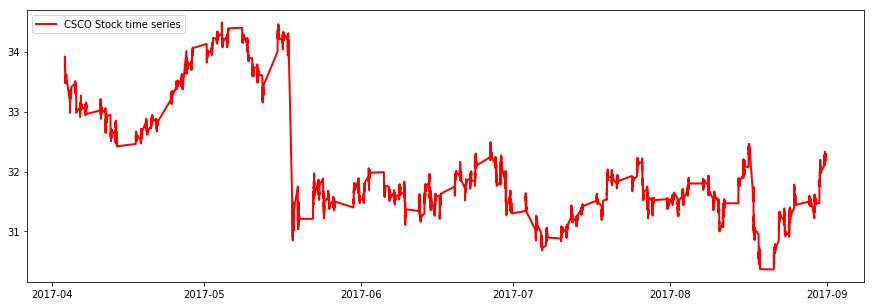

In [18]:
plt.figure(figsize=(15,5))
plt.plot(series_csco,color='red', linewidth=2,label='CSCO Stock time series')
plt.legend(loc='upper left')
plt.show()

### <--> EBAY

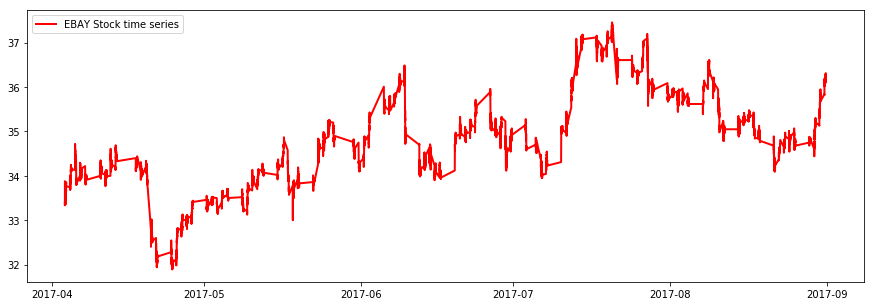

In [19]:
plt.figure(figsize=(15,5))
plt.plot(series_ebay,color='red', linewidth=2,label='EBAY Stock time series')
plt.legend(loc='upper left')
plt.show()

### Step 3.1 Plot rolling statistics and Dicky fuller test

In [20]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(1000).mean()
    rolstd = timeseries.rolling(1000).std()

    #Plot rolling statistics:
    plt.figure(figsize=(15,5))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

   

### <--> AAPL

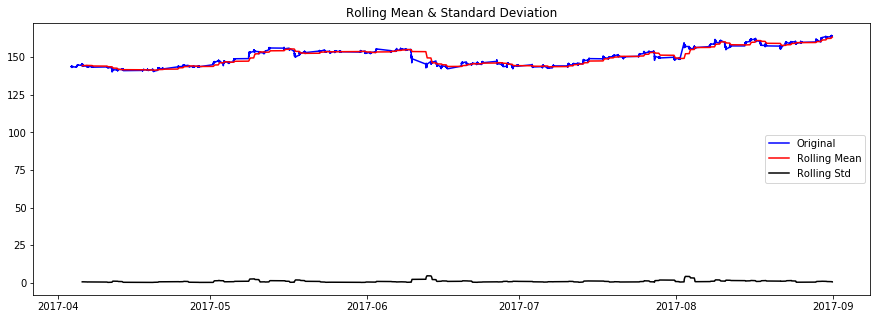

Results of Dickey-Fuller Test:
Test Statistic                    -0.912853
p-value                            0.783710
#Lags Used                        31.000000
Number of Observations Used    41234.000000
Critical Value (1%)               -3.430509
Critical Value (5%)               -2.861610
Critical Value (10%)              -2.566807
dtype: float64


In [21]:
test_stationarity(series_aapl)

#### we can observe that the rolling mean is increasing over time. Also in dicky fuller test test-statistics is greater than critical value. so we accept the null hypothesis(H0) i.e. the timeseries is not stationary.

### <--> ADP

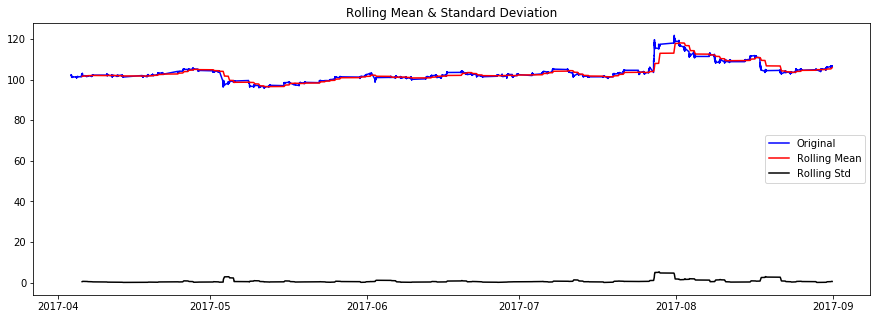

Results of Dickey-Fuller Test:
Test Statistic                    -1.704174
p-value                            0.428963
#Lags Used                        39.000000
Number of Observations Used    41226.000000
Critical Value (1%)               -3.430509
Critical Value (5%)               -2.861610
Critical Value (10%)              -2.566807
dtype: float64


In [22]:
test_stationarity(series_adp)

#### we can observe that the rolling mean is varying over time. Also in dicky fuller test test-statistics is greater than critical value. so we accept the null hypothesis(H0) i.e. the timeseries is not stationary

### <--> CBOE

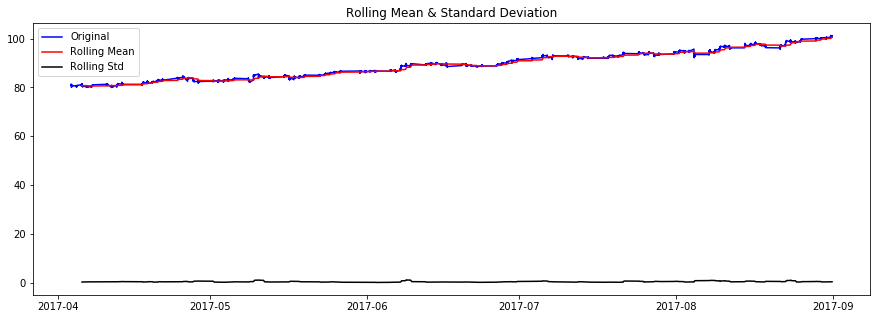

Results of Dickey-Fuller Test:
Test Statistic                     0.166339
p-value                            0.970309
#Lags Used                        27.000000
Number of Observations Used    41238.000000
Critical Value (1%)               -3.430509
Critical Value (5%)               -2.861610
Critical Value (10%)              -2.566807
dtype: float64


In [23]:
test_stationarity(series_cboe)

#### we can observe that the rolling mean is increasing over time. Also in dicky fuller test test-statistics is greater than critical value. so we accept the null hypothesis(H0) i.e. the timeseries is not stationary

### <--> CSCO

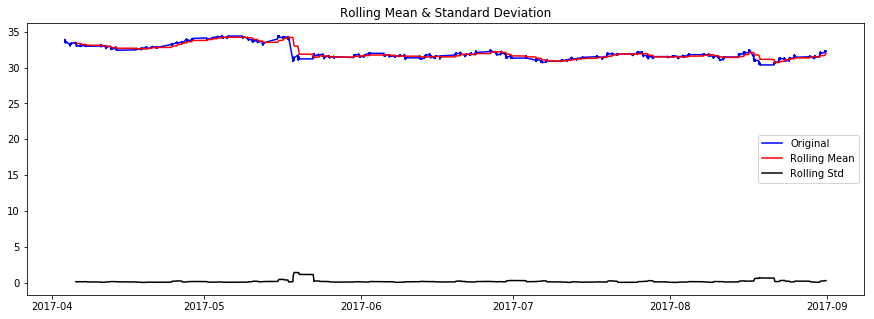

Results of Dickey-Fuller Test:
Test Statistic                    -2.395555
p-value                            0.142995
#Lags Used                        47.000000
Number of Observations Used    41218.000000
Critical Value (1%)               -3.430509
Critical Value (5%)               -2.861610
Critical Value (10%)              -2.566807
dtype: float64


In [24]:
test_stationarity(series_csco)

#### we can observe that the rolling mean is varying over time. Also in dicky fuller test test-statistics is greater than critical value. so we accept the null hypothesis(H0) i.e. the timeseries is not stationary 

### <--> EBAY

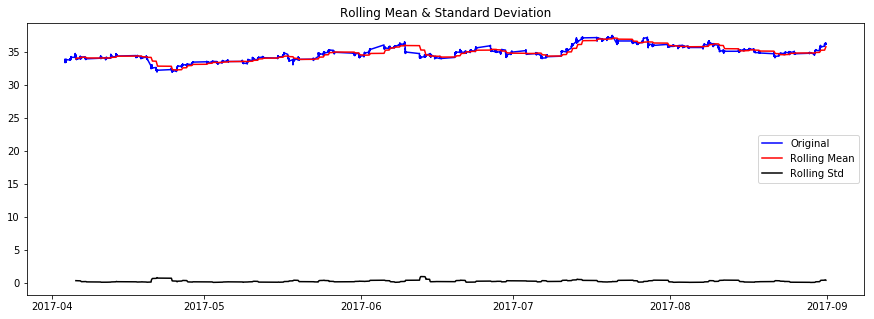

Results of Dickey-Fuller Test:
Test Statistic                    -1.875762
p-value                            0.343548
#Lags Used                        47.000000
Number of Observations Used    41218.000000
Critical Value (1%)               -3.430509
Critical Value (5%)               -2.861610
Critical Value (10%)              -2.566807
dtype: float64


In [25]:
test_stationarity(series_ebay)

#### we can observe that the rolling mean is varying over time. Also in dicky fuller test test-statistics is greater than critical value. so we accept the null hypothesis(H0) i.e. the timeseries is not stationary

### Step 4:- Eliminating Trend and Seasonality

### <--> AAPL

In [26]:
# moving average sunstraction from original data
series_aapl_new =series_aapl- series_aapl.rolling(100).mean()
series_aapl_new=series_aapl_new.dropna()
series_aapl_new.head()

DATE
2017-04-03 15:09:00   -0.508669
2017-04-03 15:10:00   -0.465569
2017-04-03 15:11:00   -0.392969
2017-04-03 15:12:00   -0.350868
2017-04-03 15:13:00   -0.428468
Name: NASDAQ.AAPL, dtype: float64

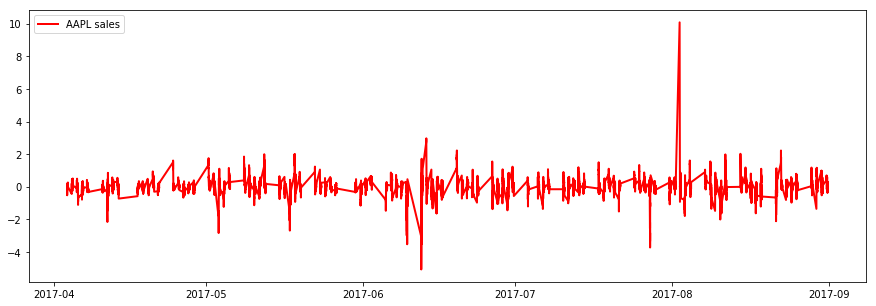

In [27]:
# visualizing the logged value
plt.figure(figsize=(15,5))
plt.plot(series_aapl_new,color='red', linewidth=2,label='AAPL sales')
plt.legend(loc='upper left')
plt.show()

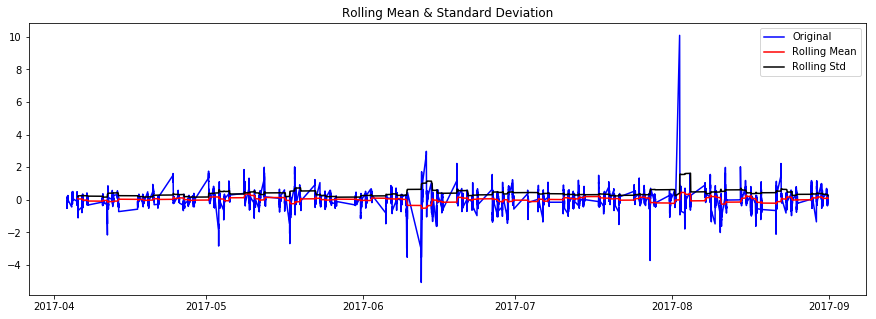

Results of Dickey-Fuller Test:
Test Statistic                   -20.736017
p-value                            0.000000
#Lags Used                        42.000000
Number of Observations Used    41124.000000
Critical Value (1%)               -3.430509
Critical Value (5%)               -2.861610
Critical Value (10%)              -2.566807
dtype: float64


In [28]:
# checking for stationarity on the new value of aapl
test_stationarity(series_aapl_new)

####  Test statistics is lesser than critical value so we reject null hypothesis. i.e. the time series is  stationary 
#### we can say with 99 % confidence level that the time series is stationary¶

### <--> ADP 

In [29]:
# moving average sunstraction from original data
series_adp_new =series_adp- series_adp.rolling(100).mean()
series_adp_new=series_adp_new.dropna()
series_adp_new.head()

DATE
2017-04-03 15:09:00   -0.739739
2017-04-03 15:10:00   -0.729739
2017-04-03 15:11:00   -0.671139
2017-04-03 15:12:00   -0.691514
2017-04-03 15:13:00   -0.682614
Name: NASDAQ.ADP, dtype: float64

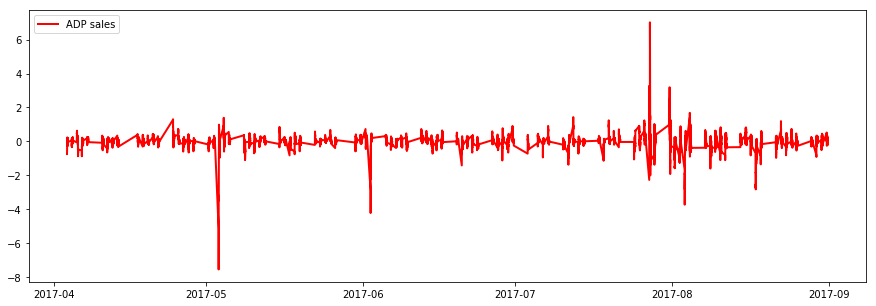

In [30]:
# visualizing the new value
plt.figure(figsize=(15,5))
plt.plot(series_adp_new,color='red', linewidth=2,label='ADP sales')
plt.legend(loc='upper left')
plt.show()

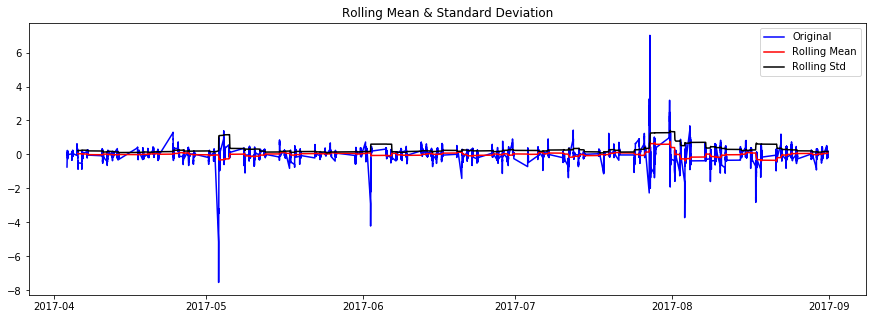

Results of Dickey-Fuller Test:
Test Statistic                   -19.295600
p-value                            0.000000
#Lags Used                        40.000000
Number of Observations Used    41126.000000
Critical Value (1%)               -3.430509
Critical Value (5%)               -2.861610
Critical Value (10%)              -2.566807
dtype: float64


In [31]:
# checking for stationarity on the new value of aapl
test_stationarity(series_adp_new)

####  Test statistics is lesser than critical value so we reject null hypothesis. i.e. the time series is  stationary 
#### we can say with 99 % confidence level that the time series is stationary¶

### <--> CBOE 

In [32]:
# moving average sunstraction from original data
series_cboe_new =series_cboe- series_cboe.rolling(100).mean()
series_cboe_new=series_cboe_new.dropna()
series_cboe_new.head()

DATE
2017-04-03 15:09:00   -0.709286
2017-04-03 15:10:00   -0.650486
2017-04-03 15:11:00   -0.610186
2017-04-03 15:12:00   -0.589986
2017-04-03 15:13:00   -0.635036
Name: NASDAQ.CBOE, dtype: float64

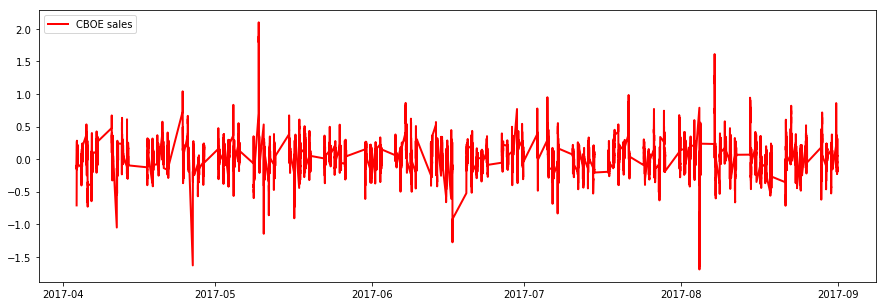

In [33]:
# visualizing the new value
plt.figure(figsize=(15,5))
plt.plot(series_cboe_new,color='red', linewidth=2,label='CBOE sales')
plt.legend(loc='upper left')
plt.show()

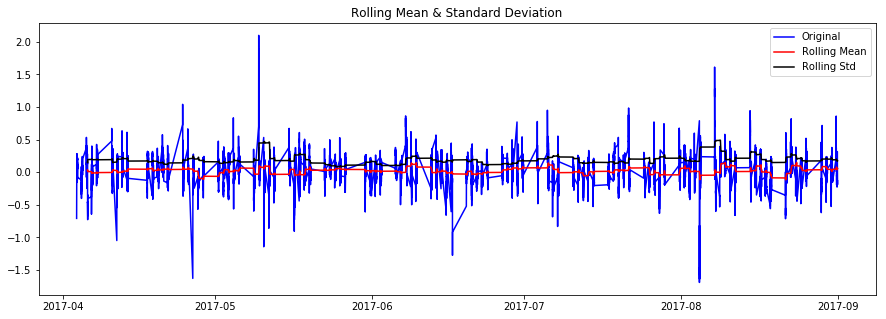

Results of Dickey-Fuller Test:
Test Statistic                   -19.594930
p-value                            0.000000
#Lags Used                        53.000000
Number of Observations Used    41113.000000
Critical Value (1%)               -3.430509
Critical Value (5%)               -2.861610
Critical Value (10%)              -2.566807
dtype: float64


In [34]:
# checking for stationarity on the new value of cboe
test_stationarity(series_cboe_new)

####  Test statistics is lesser than critical value so we reject null hypothesis. i.e. the time series is  stationary 
#### we can say with 99 % confidence level that the time series is stationary¶

### <--> CSCO  

In [35]:
# moving average sunstraction from original data
series_csco_new =series_csco- series_csco.rolling(100).mean()
series_csco_new=series_csco_new.dropna()
series_csco_new.head()

DATE
2017-04-03 15:09:00   -0.243905
2017-04-03 15:10:00   -0.226555
2017-04-03 15:11:00   -0.207955
2017-04-03 15:12:00   -0.214055
2017-04-03 15:13:00   -0.210656
Name: NASDAQ.CSCO, dtype: float64

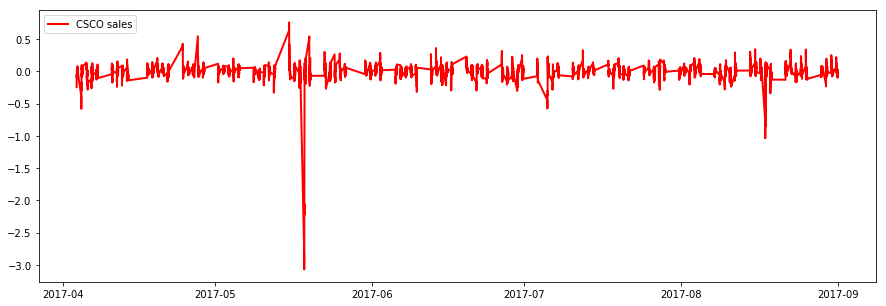

In [36]:
# visualizing the new value
plt.figure(figsize=(15,5))
plt.plot(series_csco_new,color='red', linewidth=2,label='CSCO sales')
plt.legend(loc='upper left')
plt.show()

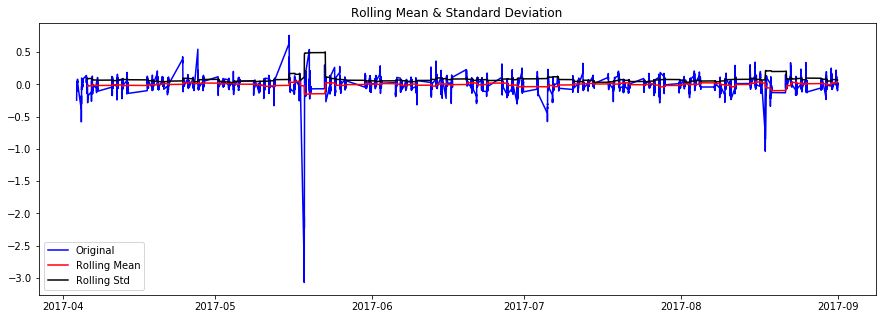

Results of Dickey-Fuller Test:
Test Statistic                   -19.771162
p-value                            0.000000
#Lags Used                        48.000000
Number of Observations Used    41118.000000
Critical Value (1%)               -3.430509
Critical Value (5%)               -2.861610
Critical Value (10%)              -2.566807
dtype: float64


In [37]:
# checking for stationarity on the new value of csco
test_stationarity(series_csco_new)

####  Test statistics is lesser than critical value so we reject null hypothesis. i.e. the time series is  stationary 
#### we can say with 99 % confidence level that the time series is stationary¶

### <--> EBAY

In [38]:
# moving average sunstraction from original data
series_ebay_new =series_ebay- series_ebay.rolling(100).mean()
series_ebay_new=series_ebay_new.dropna()
series_ebay_new.head()

DATE
2017-04-03 15:09:00   -0.240920
2017-04-03 15:10:00   -0.245745
2017-04-03 15:11:00   -0.255495
2017-04-03 15:12:00   -0.255095
2017-04-03 15:13:00   -0.256435
Name: NASDAQ.EBAY, dtype: float64

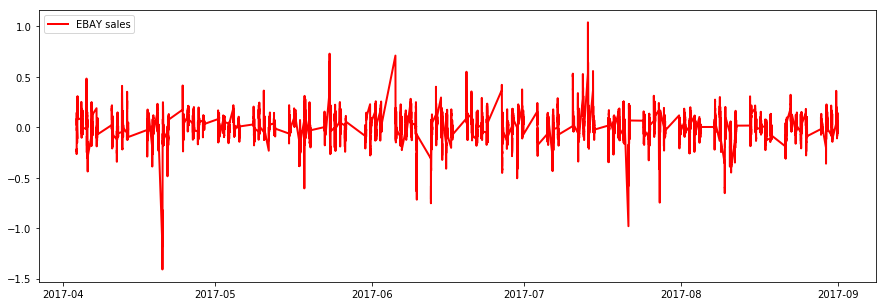

In [39]:
# visualizing the new value
plt.figure(figsize=(15,5))
plt.plot(series_ebay_new,color='red', linewidth=2,label='EBAY sales')
plt.legend(loc='upper left')
plt.show()

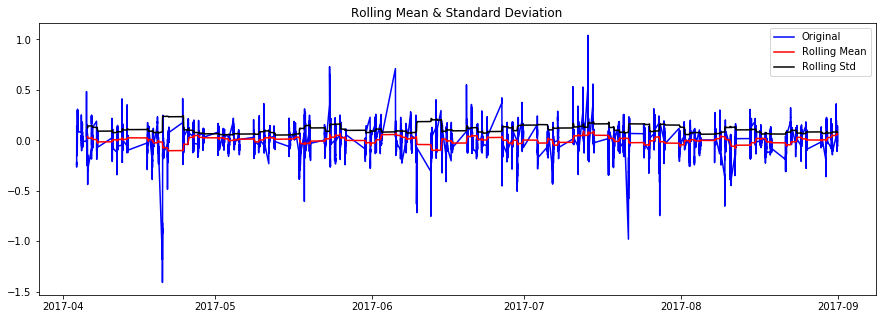

Results of Dickey-Fuller Test:
Test Statistic                   -19.591423
p-value                            0.000000
#Lags Used                        43.000000
Number of Observations Used    41123.000000
Critical Value (1%)               -3.430509
Critical Value (5%)               -2.861610
Critical Value (10%)              -2.566807
dtype: float64


In [40]:
# checking for stationarity on the new value of ebay
test_stationarity(series_ebay_new)

####  Test statistics is lesser than critical value so we reject null hypothesis. i.e. the time series is  stationary 
#### we can say with 99 % confidence level that the time series is stationary¶

### Step 5:- Forecasting a Time Series

## <--> AAPL

 The data on which we will do the the forecast will be the value of (actual value - rolling mean) for that time series

### Step 5.1  plot ACF and PACF graph

In [41]:
# top 5 rows of aapl differenced time series
series_aapl_new.head()

DATE
2017-04-03 15:09:00   -0.508669
2017-04-03 15:10:00   -0.465569
2017-04-03 15:11:00   -0.392969
2017-04-03 15:12:00   -0.350868
2017-04-03 15:13:00   -0.428468
Name: NASDAQ.AAPL, dtype: float64

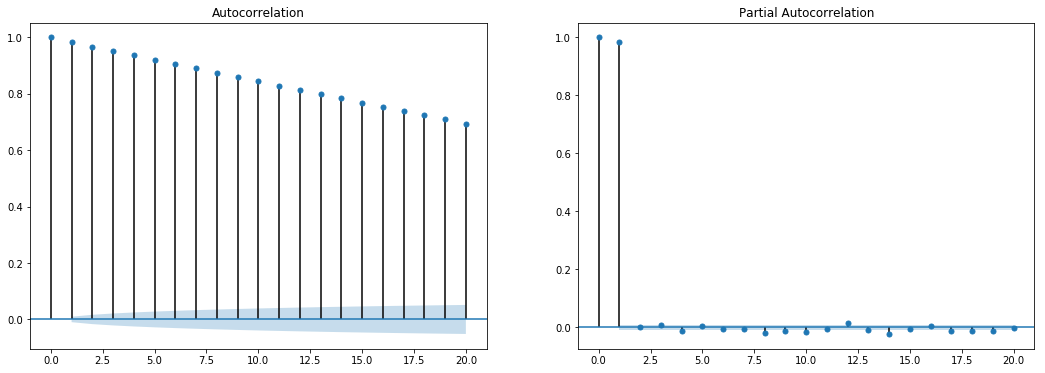

In [131]:
#ACF and PACF plots:
import statsmodels.api as sm

# show plots in the notebook
%matplotlib inline
fig = plt.figure(figsize=(18,6))

ax1 = fig.add_subplot(121)
fig = sm.graphics.tsa.plot_acf(series_aapl_new.values.squeeze()[1:], lags=20, ax=ax1)

ax2 = fig.add_subplot(122)
fig = sm.graphics.tsa.plot_pacf(series_aapl_new.values.squeeze()[1:], lags=20, ax=ax2)


### Observation
In ARIMA(p,d,q), p is calculated by looking from PACF plot and q is calulated from ACF plot.

from PACF plot we choose p=1

from ACF plot we choose q=0

so we will plot for ARIMA(1,0,0)

### step 5.2 Train the model and predict the value

In [43]:
import warnings
warnings.filterwarnings('ignore')

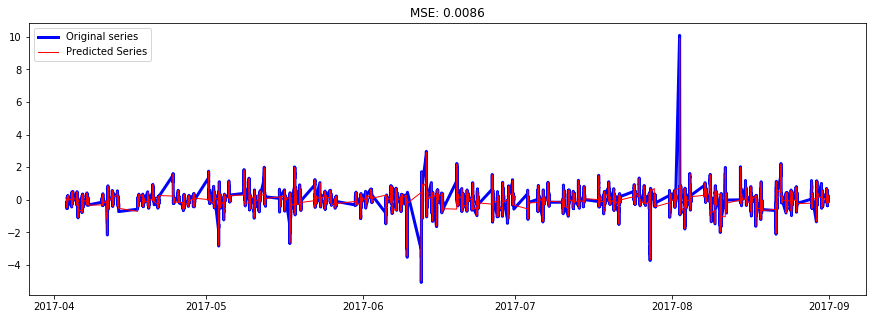

In [132]:
# for model ARIMA(1,0,0) i.e. AR Model
model = ARIMA(series_aapl_new, order=(1, 0, 0))  
series_aapl_new_pred = model.fit(disp=-1)  

plt.figure(figsize=(15,5))
plt.plot(series_aapl_new,color='blue', linewidth=3,label='Original series')
plt.plot(series_aapl_new_pred.fittedvalues,color='red', linewidth=1,label='Predicted Series')
plt.legend(loc='upper left')
plt.title('MSE: %.4f'% mean_squared_error(series_aapl_new,series_aapl_new_pred.fittedvalues) )
plt.show()

In [133]:
# transformation the predicted value into original value 
pred_transform=series_aapl_new_pred.fittedvalues
pred_transform_aapl=pred_transform+series_aapl.rolling(100).mean()[99:]
pred_transform_aapl.head()

DATE
2017-04-03 15:09:00    143.862140
2017-04-03 15:10:00    143.335620
2017-04-03 15:11:00    143.375413
2017-04-03 15:12:00    143.444723
2017-04-03 15:13:00    143.483734
dtype: float64

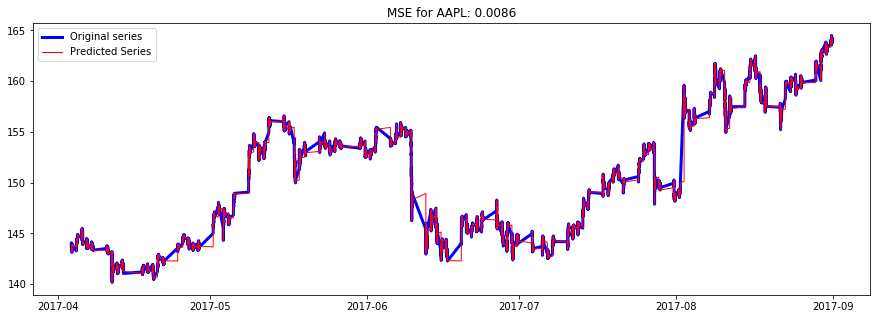

In [134]:
# plotting the original predictions
plt.figure(figsize=(15,5))
plt.plot(series_aapl,color='blue', linewidth=3,label='Original series')
plt.plot(pred_transform_aapl,color='red', linewidth=1,label='Predicted Series')
plt.legend(loc='upper left')
plt.title('MSE for AAPL: %.4f'% mean_squared_error(series_aapl.iloc[99:],pred_transform_aapl) )
plt.show()

## <--> ADP

 The data on which we will do the the forecast will be the value of (actual value - rolling mean) for that time series

### Step 5.1 plot ACF and PACF graph

In [111]:
# top 5 rows of adp differenced time series
series_adp_new.head()

DATE
2017-04-03 15:09:00   -0.739739
2017-04-03 15:10:00   -0.729739
2017-04-03 15:11:00   -0.671139
2017-04-03 15:12:00   -0.691514
2017-04-03 15:13:00   -0.682614
Name: NASDAQ.ADP, dtype: float64

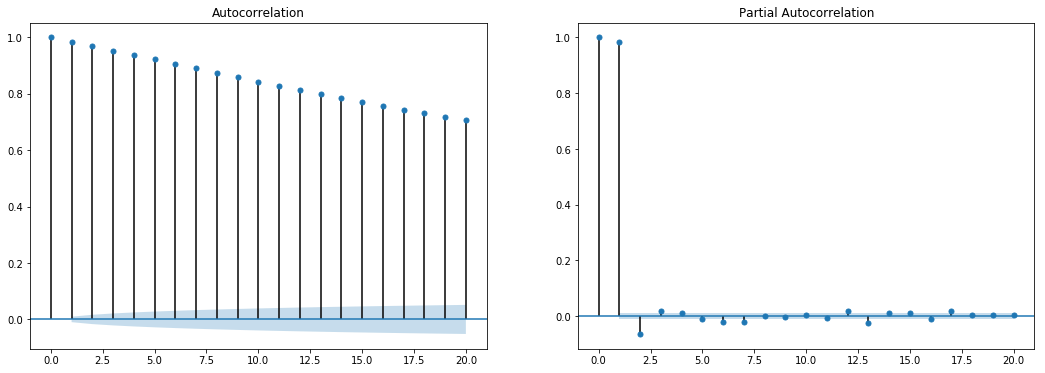

In [112]:
#ACF and PACF plots:
import statsmodels.api as sm

# show plots in the notebook
%matplotlib inline
fig = plt.figure(figsize=(18,6))

ax1 = fig.add_subplot(121)
fig = sm.graphics.tsa.plot_acf(series_adp_new.values.squeeze()[1:], lags=20, ax=ax1)

ax2 = fig.add_subplot(122)
fig = sm.graphics.tsa.plot_pacf(series_adp_new.values.squeeze()[1:], lags=20, ax=ax2)


### Observation
In ARIMA(p,d,q), p is calculated by looking from PACF plot and q is calulated from ACF plot.

from PACF plot we choose p=2

from ACF plot we choose q=0

so we will plot for ARIMA(2,0,0)

### step 5.2 Train the model and predict the value 

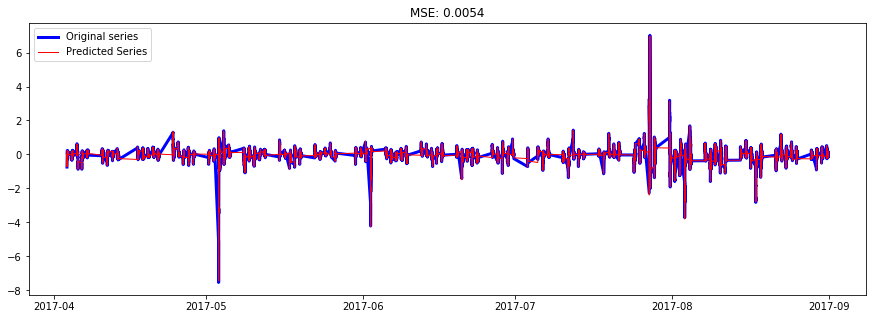

In [135]:
# for model ARIMA(2,0,0) i.e. AR Model
model = ARIMA(series_adp_new, order=(2, 0, 0))  
series_adp_new_pred = model.fit(disp=-1)  

plt.figure(figsize=(15,5))
plt.plot(series_adp_new,color='blue', linewidth=3,label='Original series')
plt.plot(series_adp_new_pred.fittedvalues,color='red', linewidth=1,label='Predicted Series')
plt.legend(loc='upper left')
plt.title('MSE: %.4f'% mean_squared_error(series_adp_new,series_adp_new_pred.fittedvalues) )
plt.show()

In [136]:
# transformation the predicted value into original value 
pred_transform=series_adp_new_pred.fittedvalues
pred_transform_adp=pred_transform+series_adp.rolling(100).mean()[99:]
pred_transform_adp.head()

DATE
2017-04-03 15:09:00    101.974219
2017-04-03 15:10:00    101.231067
2017-04-03 15:11:00    101.233660
2017-04-03 15:12:00    101.284823
2017-04-03 15:13:00    101.250807
dtype: float64

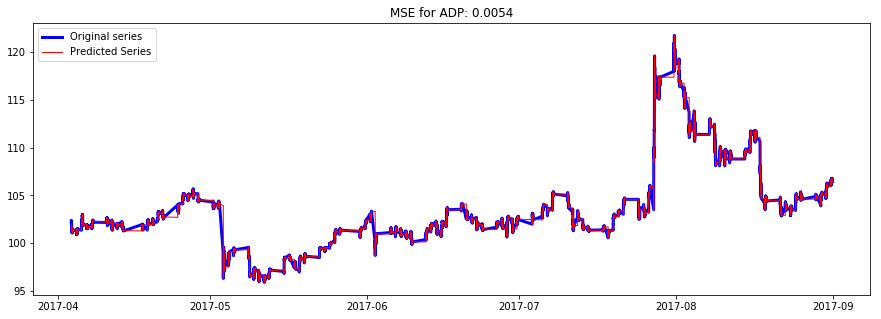

In [137]:
# plotting the original predictions
plt.figure(figsize=(15,5))
plt.plot(series_adp,color='blue', linewidth=3,label='Original series')
plt.plot(pred_transform_adp,color='red', linewidth=1,label='Predicted Series')
plt.legend(loc='upper left')
plt.title('MSE for ADP: %.4f'% mean_squared_error(series_adp.iloc[99:],pred_transform_adp) )
plt.show()

## <--> CBOE

The data on which we will do the the forecast will be the value of (actual value - rolling mean) for that time series

###  Step 5.1 plot ACF and PACF graph

In [116]:
# top 5 rows of cboe differenced time series
series_cboe_new.head()

DATE
2017-04-03 15:09:00   -0.709286
2017-04-03 15:10:00   -0.650486
2017-04-03 15:11:00   -0.610186
2017-04-03 15:12:00   -0.589986
2017-04-03 15:13:00   -0.635036
Name: NASDAQ.CBOE, dtype: float64

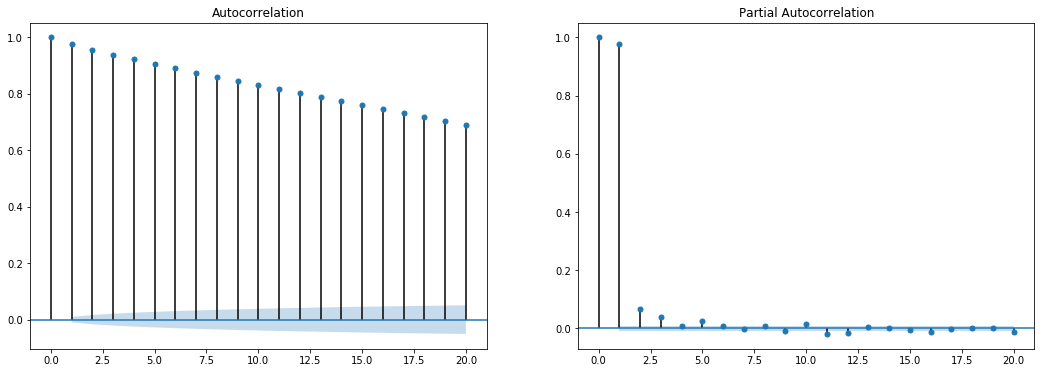

In [117]:
#ACF and PACF plots:
import statsmodels.api as sm

# show plots in the notebook
%matplotlib inline
fig = plt.figure(figsize=(18,6))

ax1 = fig.add_subplot(121)
fig = sm.graphics.tsa.plot_acf(series_cboe_new.values.squeeze()[1:], lags=20, ax=ax1)

ax2 = fig.add_subplot(122)
fig = sm.graphics.tsa.plot_pacf(series_cboe_new.values.squeeze()[1:], lags=20, ax=ax2)


### Observation
In ARIMA(p,d,q), p is calculated by looking from PACF plot and q is calulated from ACF plot.

from PACF plot we choose p=3

from ACF plot we choose q=0

so we will plot for ARIMA(3,0,0)

### step 5.2 Train the model and predict the value 

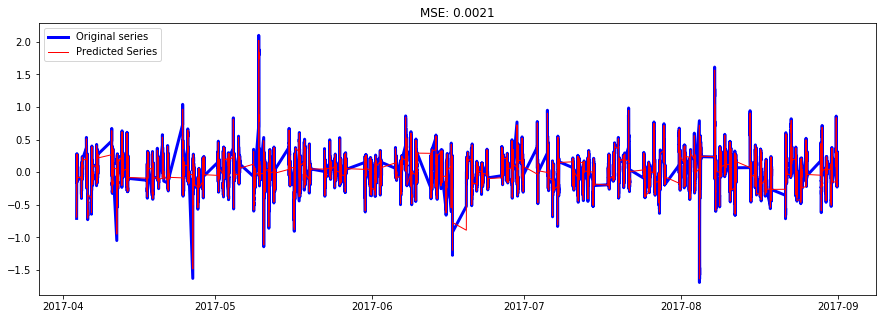

In [138]:
# for model ARIMA(3,0,0) i.e. AR Model
model = ARIMA(series_cboe_new, order=(3, 0, 0))  
series_cboe_new_pred = model.fit(disp=-1)  

plt.figure(figsize=(15,5))
plt.plot(series_cboe_new,color='blue', linewidth=3,label='Original series')
plt.plot(series_cboe_new_pred.fittedvalues,color='red', linewidth=1,label='Predicted Series')
plt.legend(loc='upper left')
plt.title('MSE: %.4f'% mean_squared_error(series_cboe_new,series_cboe_new_pred.fittedvalues) )
plt.show()

In [139]:
# transformation the predicted value into original value 
pred_transform=series_cboe_new_pred.fittedvalues
pred_transform_cboe=pred_transform+series_cboe.rolling(100).mean()[99:]
pred_transform_cboe.head()

DATE
2017-04-03 15:09:00    80.832634
2017-04-03 15:10:00    80.108016
2017-04-03 15:11:00    80.150314
2017-04-03 15:12:00    80.177714
2017-04-03 15:13:00    80.189673
dtype: float64

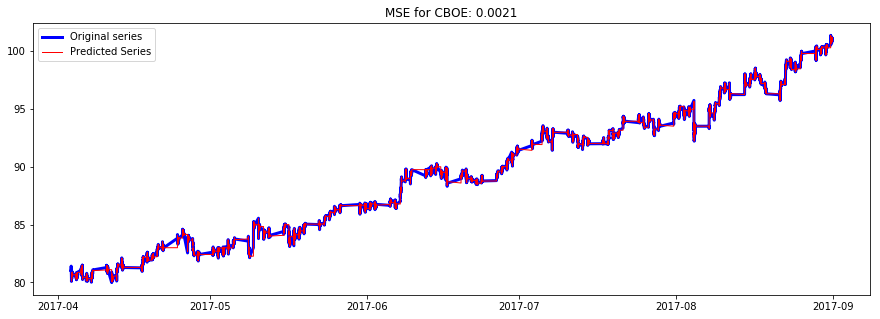

In [140]:
# plotting the original predictions
plt.figure(figsize=(15,5))
plt.plot(series_cboe,color='blue', linewidth=3,label='Original series')
plt.plot(pred_transform_cboe,color='red', linewidth=1,label='Predicted Series')
plt.legend(loc='upper left')
plt.title('MSE for CBOE: %.4f'% mean_squared_error(series_cboe.iloc[99:],pred_transform_cboe) )
plt.show()

## <--> CSCO

The data on which we will do the the forecast will be the value of (actual value - rolling mean) for that time series

### Step 5.1 plot ACF and PACF graph 

In [121]:
# top 5 rows of csco differenced time series
series_csco_new.head()

DATE
2017-04-03 15:09:00   -0.243905
2017-04-03 15:10:00   -0.226555
2017-04-03 15:11:00   -0.207955
2017-04-03 15:12:00   -0.214055
2017-04-03 15:13:00   -0.210656
Name: NASDAQ.CSCO, dtype: float64

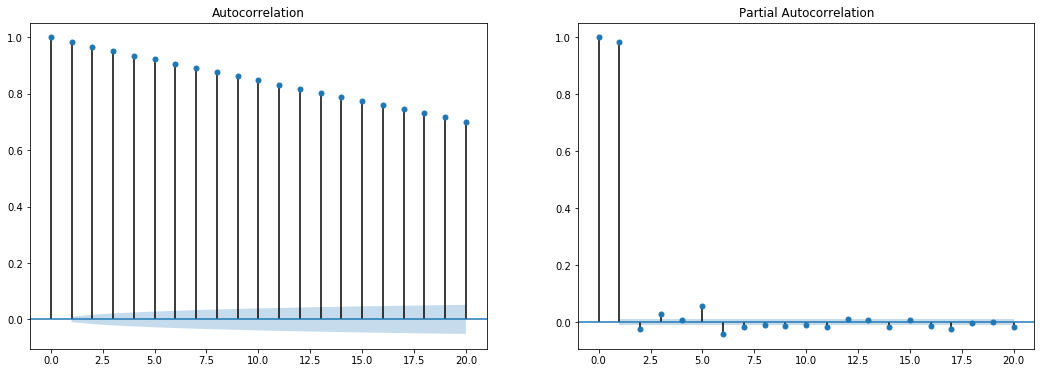

In [122]:
#ACF and PACF plots:
import statsmodels.api as sm

# show plots in the notebook
%matplotlib inline
fig = plt.figure(figsize=(18,6))

ax1 = fig.add_subplot(121)
fig = sm.graphics.tsa.plot_acf(series_csco_new.values.squeeze()[1:], lags=20, ax=ax1)

ax2 = fig.add_subplot(122)
fig = sm.graphics.tsa.plot_pacf(series_csco_new.values.squeeze()[1:], lags=20, ax=ax2)


### Observation
In ARIMA(p,d,q), p is calculated by looking from PACF plot and q is calulated from ACF plot.

from PACF plot we choose p=3

from ACF plot we choose q=0

so we will plot for ARIMA(3,0,0)

### step 5.2 Train the model and predict the value

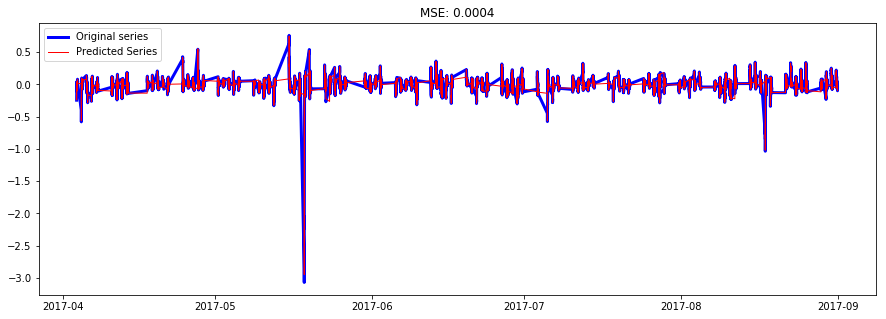

In [141]:
# for model ARIMA(3,0,0) i.e. AR Model
model = ARIMA(series_csco_new, order=(3, 0, 0))  
series_csco_new_pred = model.fit(disp=-1)  

plt.figure(figsize=(15,5))
plt.plot(series_csco_new,color='blue', linewidth=3,label='Original series')
plt.plot(series_csco_new_pred.fittedvalues,color='red', linewidth=1,label='Predicted Series')
plt.legend(loc='upper left')
plt.title('MSE: %.4f'% mean_squared_error(series_csco_new,series_csco_new_pred.fittedvalues) )
plt.show()

In [142]:
# transformation the predicted value into original value 
pred_transform=series_csco_new_pred.fittedvalues
pred_transform_csco=pred_transform+series_csco.rolling(100).mean()[99:]
pred_transform_csco.head()

DATE
2017-04-03 15:09:00    33.731785
2017-04-03 15:10:00    33.491638
2017-04-03 15:11:00    33.505615
2017-04-03 15:12:00    33.519457
2017-04-03 15:13:00    33.509416
dtype: float64

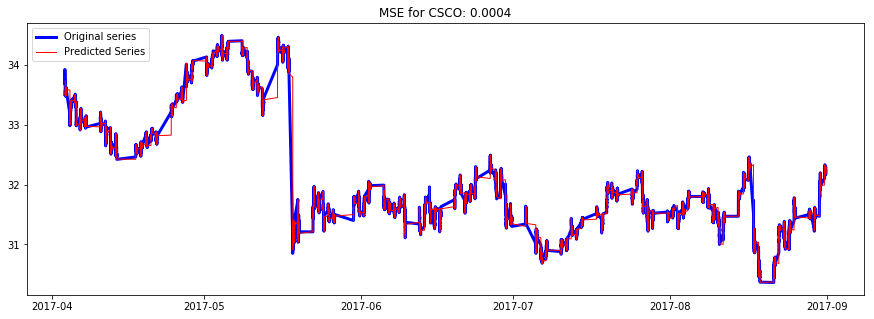

In [143]:
# plotting the original predictions
plt.figure(figsize=(15,5))
plt.plot(series_csco,color='blue', linewidth=3,label='Original series')
plt.plot(pred_transform_csco,color='red', linewidth=1,label='Predicted Series')
plt.legend(loc='upper left')
plt.title('MSE for CSCO: %.4f'% mean_squared_error(series_csco.iloc[99:],pred_transform_csco) )
plt.show()

## <--> EBAY

The data on which we will do the the forecast will be the value of (actual value - rolling mean) for that time series

### Step 5.1 plot ACF and PACF graph 

In [127]:
# top 5 rows of ebay differenced time series
series_ebay_new.head()

DATE
2017-04-03 15:09:00   -0.240920
2017-04-03 15:10:00   -0.245745
2017-04-03 15:11:00   -0.255495
2017-04-03 15:12:00   -0.255095
2017-04-03 15:13:00   -0.256435
Name: NASDAQ.EBAY, dtype: float64

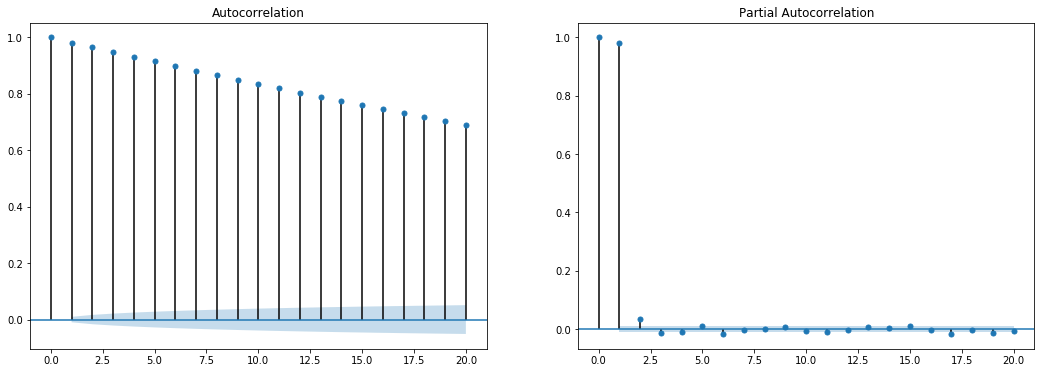

In [126]:
#ACF and PACF plots:
import statsmodels.api as sm

# show plots in the notebook
%matplotlib inline
fig = plt.figure(figsize=(18,6))

ax1 = fig.add_subplot(121)
fig = sm.graphics.tsa.plot_acf(series_ebay_new.values.squeeze()[1:], lags=20, ax=ax1)

ax2 = fig.add_subplot(122)
fig = sm.graphics.tsa.plot_pacf(series_ebay_new.values.squeeze()[1:], lags=20, ax=ax2)


### Observation
In ARIMA(p,d,q), p is calculated by looking from PACF plot and q is calulated from ACF plot.

from PACF plot we choose p=2

from ACF plot we choose q=0

so we will plot for ARIMA(2,0,0)

### step 5.2 Train the model and predict the value 

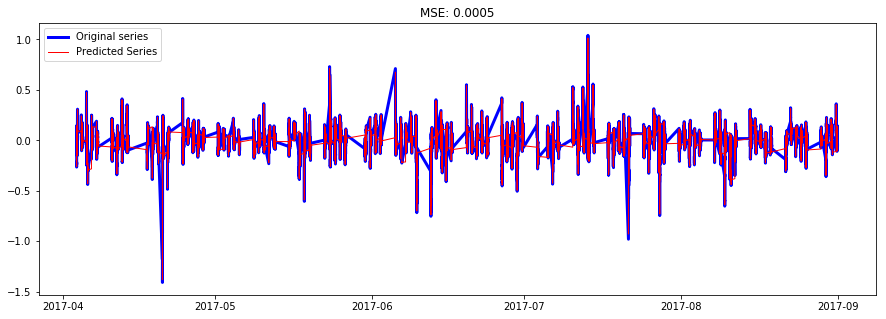

In [144]:
# for model ARIMA(2,0,0) i.e. AR Model
model = ARIMA(series_ebay_new, order=(2, 0, 0))  
series_ebay_new_pred = model.fit(disp=-1)  

plt.figure(figsize=(15,5))
plt.plot(series_ebay_new,color='blue', linewidth=3,label='Original series')
plt.plot(series_ebay_new_pred.fittedvalues,color='red', linewidth=1,label='Predicted Series')
plt.legend(loc='upper left')
plt.title('MSE: %.4f'% mean_squared_error(series_ebay_new,series_ebay_new_pred.fittedvalues) )
plt.show()

In [148]:
# transformation the predicted value into original value 
pred_transform=series_ebay_new_pred.fittedvalues
pred_transform_ebay=pred_transform+series_ebay.rolling(100).mean()[99:]
pred_transform_ebay.head()

DATE
2017-04-03 15:09:00    33.628608
2017-04-03 15:10:00    33.389225
2017-04-03 15:11:00    33.384248
2017-04-03 15:12:00    33.374436
2017-04-03 15:13:00    33.374824
dtype: float64

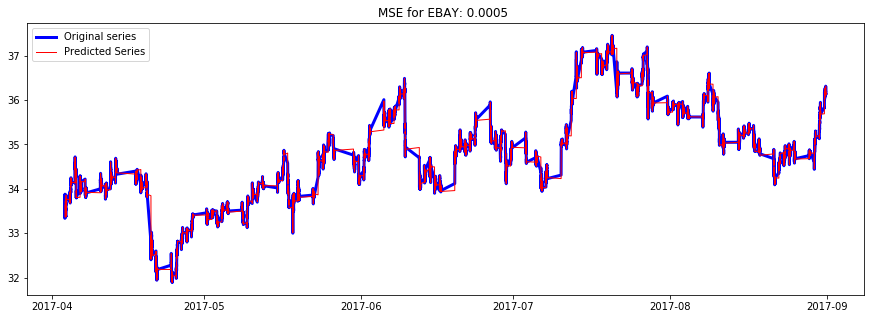

In [146]:
# plotting the original predictions
plt.figure(figsize=(15,5))
plt.plot(series_ebay,color='blue', linewidth=3,label='Original series')
plt.plot(pred_transform_ebay,color='red', linewidth=1,label='Predicted Series')
plt.legend(loc='upper left')
plt.title('MSE for EBAY: %.4f '% mean_squared_error(series_ebay.iloc[99:],pred_transform_ebay) )
plt.show()

## Conclusion
 
for NASDAQ.AAPL:-We used AR model where MSE = 0.0086

for NASDAQ.ADP:-We used AR model where MSE = 0.0054

for NASDAQ.CBOE:-We used AR model where MSE = 0.0021

for NASDAQ.CSCO:-We used AR model where MSE = 0.0004

for NASDAQ.EBAY:-We used AR model where MSE = 0.0005
